# CEIA Deep Learning - Examen Final - Ej:1

Alumno: Alianak, Juan Pablo

Descargar el dataset desde el siguiente link. Entrenar el modelo propuesto a continuación
de este enunciado. El modelo está haciendo underfitting, overfitting o un fit correcto. ¿Por
qué? Explicar el procedimiento realizado.

𝑦ℎ𝑎𝑡 = 𝑋3 * 𝑊1 + 𝑋2 * 𝑊2 + 𝑋 * 𝑊1 + 𝑏

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


### Importamos el dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CEIA/DL/TP_Final/dataset_1.csv')

In [4]:
df.head()

,# X,Y
0,1.791979,4.952906
1,0.846885,1.424248
2,1.000300,0.454364
3,1.884188,6.681510
4,0.889089,1.211691


In [5]:
df.describe()

,# X,Y
count,10000.000000,10000.000000
mean,1.000000,2.029839
std,0.577437,2.303106
min,0.000000,-0.897512
25%,0.500000,0.383598
50%,1.000000,1.105209
75%,1.500000,3.831945
max,2.000000,8.912945


In [6]:
df.rename(columns = {'# X':'X'}, inplace = True)

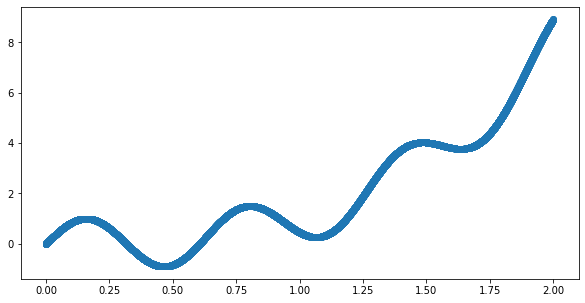

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['X'],y=df['Y'])
plt.show()

In [8]:
x = np.array(df['X'])
y = np.array(df['Y'])

### Generamos el modelo

MSE =  0.5227045074724324


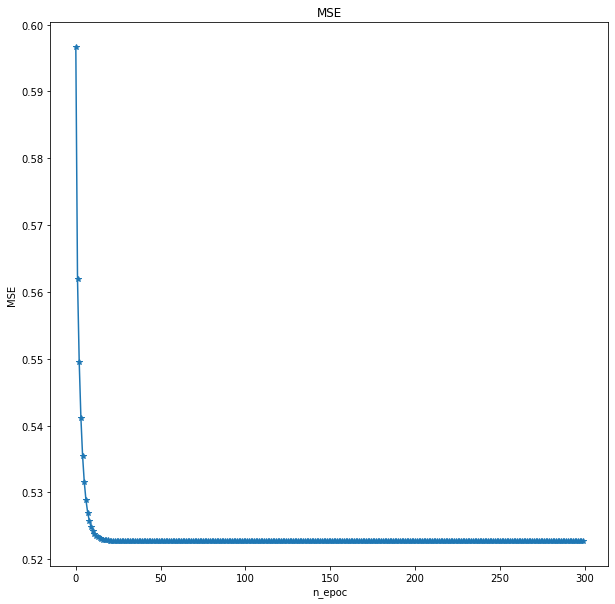

In [13]:
n_epoc = 300
lr = 1e-3

w = np.random.random((2))
b = np.random.random((1)) 

mse = np.empty(n_epoc)

for i in range(n_epoc):
    
    err = np.empty(len(y))
    
    for j in np.arange(len(y)):
        
        # 1) Fordward
        z = w[0]*x[j]**3 + w[1]*x[j]**2 + w[0]*x[j] + b[0]
        
        # 2) Error
        err[j] = y[j] - z

        # 3) Backpropagation
        dw0 = -2 * err[j] * (x[j]**3 + x[j])
        dw1 = -2 * err[j] * (x[j]**2)
        db0 = -2 * err[j]

        # 4) Actualizaciones
        w[0] = w[0] - dw0*lr
        w[1] = w[1] - dw1*lr
        b[0] = b[0] - db0*lr

    mse[i] = np.sum(err**2) / len(y)
    
plt.figure(figsize=(10,10))
plt.title('MSE'),plt.xlabel('n_epoc'),plt.ylabel('MSE')
plt.plot(mse,'*-')

print("MSE = ", mse.min())


In [14]:
y_hat = w[0]*x**3 + w[1]*x**2 + w[0]*x + b[0]

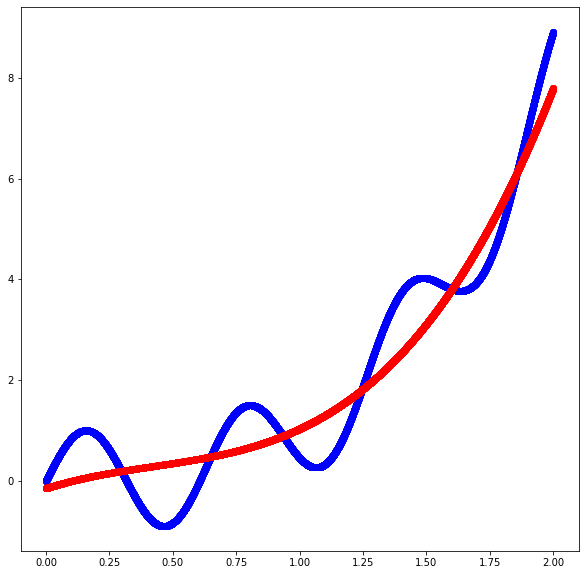

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(x,y,color='b')
plt.scatter(x,y_hat,color='r')
plt.show()

El modelo hace underfittig, ya que no tiene la suficiente capacidad (con un polinomio de 3er grado) de aprender y hacer un fit correcto sobre el dataset. Para aproximar los datos con un polinomio, vamos a explorar de que grado deberia ser

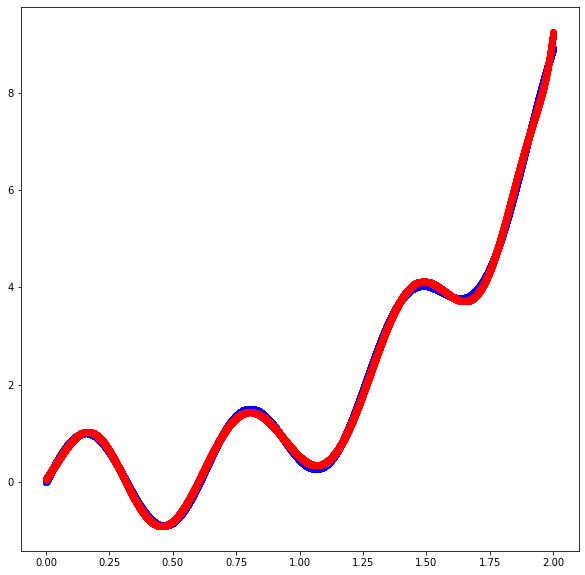

In [12]:
import numpy.polynomial as P
coef = P.polynomial.polyfit(x, y, deg=11)
y_hat_pol = P.polynomial.polyval(x,coef)
plt.figure(figsize=(10,10))
plt.scatter(x,y,color='b')
plt.scatter(x,y_hat_pol,color='r')
plt.show()

Con un polinomio de alto grado (en este caso grado 11) empezamos a poder aproximarlo al dataset y hacer un fit correcto